<a href="https://colab.research.google.com/github/geonextgis/PyImgProc-Image-Processing-using-Python/blob/main/018_Image_Processing_using_Pillow_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Image Processing using Pillow in Python**
PIL stands for Python Imaging Library. It's a library in Python that adds support for opening, manipulating, and saving many different image file formats. PIL provides functionalities such as image resizing, cropping, filtering, and basic image processing operations.

PIL has been a popular choice for working with images in Python for many years. However, its development was discontinued after version 1.1.7. Fortunately, the Pillow library was created as a fork of PIL to continue its development and maintenance. Pillow is essentially a drop-in replacement for PIL, providing all the functionalities of PIL and more, while also being actively maintained and updated. Therefore, when people refer to PIL today, they often mean Pillow.

Pillow (or PIL) is widely used in various Python projects for tasks such as image manipulation, computer vision, web development, and more.

## **Import Necessary Libraries**

In [54]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [92]:
from PIL import Image
import glob

## **Load an Image**

🤔 **Note:**<br> The mode of an image defines the type and depth of a pixel in the image. The current release supports the following standard modes:

- 1 (1-bit pixels, black and white, stored with one pixel per byte)

- L (8-bit pixels, black and white)

- P (8-bit pixels, mapped to any other mode using a colour palette)

- RGB (3x8-bit pixels, true colour)

- RGBA (4x8-bit pixels, true colour with transparency mask)

- CMYK (4x8-bit pixels, colour separation)

- YCbCr (3x8-bit pixels, colour video format)

- I (32-bit signed integer pixels)

- F (32-bit floating point pixels)

In [105]:
img_path = "/content/drive/MyDrive/Colab Notebooks/GitHub Repo/PyImgProc-Image-Processing-using-Python/Datasets/High_Res_RGB_Google_Image.tif"
img = Image.open(img_path)

# Print the type of the image
print("Image Type:", type(img))

# Print the format of the image
print("Image Format:", img.format)

# Print the mode of the image
print("Image Mode:", img.mode)

# Print the size of the image
print("Image Size:", img.size)

Image Type: <class 'PIL.TiffImagePlugin.TiffImageFile'>
Image Format: TIFF
Image Mode: RGB
Image Size: (2048, 2048)


## **Resizing an Image**
In the Python Imaging Library (PIL), which is now maintained as the Pillow library, you can resize an image using the resize() method. Additionally, the thumbnail() method provides a way to resize an image while preserving its aspect ratio.

- In the `resize(` method, you specify the new dimensions for the image. If the aspect ratio of the new dimensions doesn't match the aspect ratio of the original image, the resized image will be distorted.

- In contrast, the `thumbnail()` method resizes the image to fit within the specified dimensions while preserving the aspect ratio. The image is resized so that the longer side fits within the given dimensions, and the other side is adjusted accordingly. This means the image is resized proportionally and not distorted.


### **Resize**

In [106]:
img_resized = img.resize((200, 300))
img_resized.save("test_image_resize.jpg")

(200, 300)


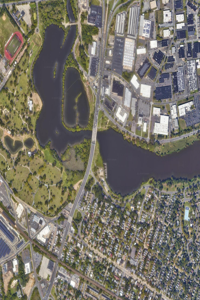

In [107]:
print(img_resized.size)
display(img_resized)

In [108]:
img_resized = img.resize((4048, 4600))
img_resized.save("test_image_resize.jpg")

In [109]:
print(img_resized.size)
# display(img_resized)

(4048, 4600)


### **Thumbnail**

In [110]:
img.thumbnail((200, 300))
img.save("test_image_thumbnail.jpg")

(200, 200)


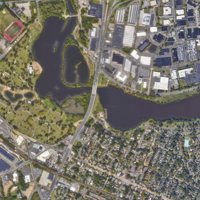

In [111]:
print(img.size)
display(img)

In [112]:
# img.thumbnail((1200, 1200))
# img.save("test_image_thumbnail.jpg")

In [113]:
# print(img.size)
# display(img)

## **Cropping an Image**

(150, 150)


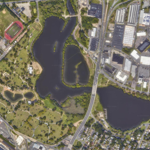

In [114]:
cropped_image = img.crop((0, 0, 150, 150))
cropped_image.save(f"cropped_image.jpg")

print(cropped_image.size)
display(cropped_image)

(200, 200)


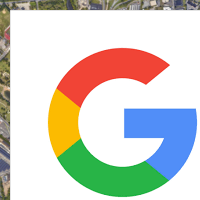

In [115]:
# Copy and Paste images
img_google = Image.open("/content/google.png")

img_copy = img.copy()

# Paste the google image on top of the copied image
img_copy.paste(img_google, (10, 10))
img_copy.save("Pasted_Image.jpg")

print(img_copy.size)
display(img_copy)

## **Image Rotation**

(200, 200)


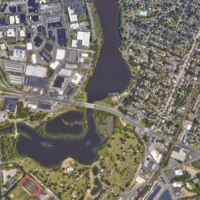

In [116]:
# Rotate the image about 90 degrees
img_90 = img.rotate(90)
img_90.save("rotated_image_90.jpg")

print(img_90.size)
display(img_90)

(200, 200)


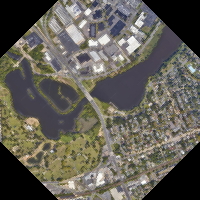

In [117]:
# Rotate the image about 45 degrees
img_45 = img.rotate(45)
img_45.save("rotated_image_45.jpg")

print(img_45.size)
display(img_45)

## **Image Flip**

(200, 200)


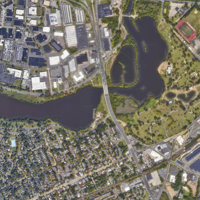

In [118]:
# Flip the image Left to Right
image_flipLR = img.transpose(Image.FLIP_LEFT_RIGHT)
image_flipLR.save("flipped_image_LR.jpg")

print(image_flipLR.size)
display(image_flipLR)

(200, 200)


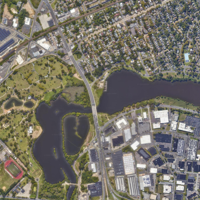

In [119]:
# Flip the image Top to Bottom
image_flipTB = img.transpose(Image.FLIP_TOP_BOTTOM)
image_flipTB.save("flipped_image_TB.jpg")

print(image_flipTB.size)
display(image_flipTB)

## **Grayscale**

(200, 200)


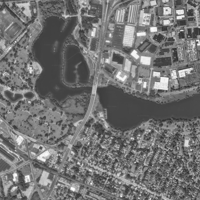

In [120]:
# Convert the image into grayscale
gray_img = img.convert("L")
gray_img.save("grayscale_image.jpg")

print(gray_img.size)
display(gray_img)

## **Automate Image Processing Task using glob**

In [104]:
folder_path = "/content/drive/MyDrive/Colab Notebooks/GitHub Repo/PyImgProc-Image-Processing-using-Python/Datasets/*.tif"

# Read all the tif files and save a 45 degree rotated version in jpg format
for f in glob.glob(folder_path):
    temp_img = Image.open(f)
    temp_img_rotated = temp_img.rotate(45)
    # Convert into Grayscale
    temp_img_rotated = temp_img_rotated.convert("L")
    file_name = f.split("/")[-1].split(".")[0] + "_Rotated.jpg"
    temp_img_rotated.save(file_name, "PNG")